In [4]:
import numpy as np
import pandas as pd
import sympy as S
from scipy import stats

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
mpl.style.use('seaborn-darkgrid')
mpl.rcParams.update({'font.size': 18})

In [6]:
pd.options.display.max_rows = 10

## Hypothesis Testing and P-Values

It is sometimes very difficult to unequivocally attribute outcomes to causal
factors. For example, did your  experiment generate the outcome you were hoping
for or not?  Maybe something did happen, but the effect is not pronounced
enough to separate it from inescapable measurement errors or other
factors in the ambient environment?  Hypothesis testing is a powerful
statistical method to address these questions.  Let's begin by again
considering our coin-tossing experiment with unknown parameter $p$.  Recall
that the individual coin-flips are Bernoulli distributed.  The first step is
to establish separate hypotheses.  First, $H_0$ is the so-called null
hypothesis. In our case this can be

$$
H_0 \colon \theta <  \frac{1}{2}
$$

 and the alternative hypothesis is then

$$
H_1 \colon \theta \geq  \frac{1}{2}
$$

 With this set up, the question now boils down to figuring out which
hypothesis the data is most consistent with.  To choose between these, we need
a statistical test that is a function, $G$, of the sample set
$\mathbf{X}_n=\left\{ X_i \right\}_n $ into the real line, where $X_i$ is the
heads or tails outcome ($X_i \in \lbrace 0,1 \rbrace$). In other words, we
compute $G(\mathbf{X}_n)$ and check if it exceeds a threshold $c$. If not, then
we declare $H_0$ (otherwise, declare $H_1$). Notationally, this is the
following:

$$
\begin{align*}
 G(\mathbf{X}_n) < c & \Rightarrow H_0   \\\
 G(\mathbf{X}_n) \geq c & \Rightarrow H_1
\end{align*}
$$

 In summary, we have the observed data $\mathbf{X}_n$ and a function
$G$ that maps that data onto the real line. Then, using the
constant $c$ as a threshold, the inequality effectively divides the real line
into two parts, one corresponding to each of the hypotheses.

Whatever this test $G$ is, it will make mistakes of two types --- false
negatives and false positives. The false positives arise from the case where we
declare $H_0$ when the test says we should declare $H_1$.  This is
summarized in the Table and figures below (from (https://www.westgard.com/lesson39.htm).

![](fig-statistics/truth_table.gif)

![](fig-statistics/truth_table_2.gif)

![](fig-statistics/truth_table_3.gif)

In [ ]:
#![](fig-statistics/truth_table_wiki.png)

 For this example, here are the false positives (aka false alarms):

$$
P_{FA} = \mathbb{P}\left( G(\mathbf{X}_n) > c \mid \theta \leq \frac{1}{2} \right)
$$

 Or, equivalently,

$$
P_{FA} = \mathbb{P}\left( G(\mathbf{X}_n) > c \mid H_0 \right)
$$

 Likewise, the other error is a false negative, which we can write
analogously as

$$
P_{FN} = \mathbb{P}\left( G(\mathbf{X}_n) < c \vert H_1\right)
$$

 By choosing some acceptable values for either of these errors,
we can solve for the other one.  The practice is usually to pick a value of
$P_{FA}$ and then find the corresponding value of $P_{FN}$.  Note that it is
traditional in engineering to speak about *detection probability*, which is
defined as

$$
P_{D} = 1- P_{FN} = \mathbb{P}\left( G(\mathbf{X}_n) > c \mid H_1\right)
$$

 In other words, this is the probability of declaring $H_1$ when the
test exceeds the threshold. This is otherwise known as the *probability of a
true detection* or *true-detect*.

## Back to the Coin Flipping Example

In our previous maximum likelihood discussion, we wanted to derive an
estimator for the *value* of the probability of heads for the coin
flipping experiment. For hypothesis testing, we want to ask a softer
question: is the probability of heads greater or less than $\frac{1}{2}$? As we
just established, this leads to the two hypotheses:

$$
H_0 \colon \theta < \frac{1}{2}
$$

 versus,

$$
H_1 \colon \theta > \frac{1}{2}
$$

 Let's assume we have five observations.  Now we need the $G$ function
and a threshold $c$ to help pick between the two hypotheses. Let's count the
number of heads observed in five observations as our
criterion. Thus, we have

$$
G(\mathbf{X}_5) := \sum_{i=1}^5 X_i
$$

 and, suppose further that we pick $H_1$  only if exactly five out of
five observations are heads. We'll call this the *all-heads* test.

Now, because all of the $X_i$ are random variables, so is $G$ and we must
find the corresponding probability mass function for $G$.  Assuming the
individual coin tosses are independent, the probability of five heads is $\theta^5$.
This means that the probability of rejecting the $H_0$ hypothesis (and choosing
$H_1$, because there are only two choices here) based on the unknown underlying
probability is $\theta^5$. In the parlance, this is known and the *power function*
as in denoted by $\beta$ as in

$$
\beta(\theta) = \theta^5
$$

 Let's get a quick plot this in [Figure](#fig:Hypothesis_testing_001).

<!-- @@@CODE src-statistics/Hypothesis_Testing.py fromto: import numpy as np@plt.savefig -->

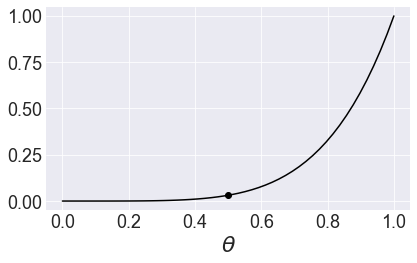

<Figure size 360x432 with 0 Axes>

In [8]:
fig,ax = plt.subplots()
plt.figure(figsize=(5,6))
xi = np.linspace(0,1,50)
ax.plot(xi, (xi)**5,'-k',label='all heads')
ax.set_xlabel(r'$\theta$',fontsize=22)
ax.plot(0.5,(0.5)**5,'ko')

fig.tight_layout()


<!-- dom:FIGURE: [fig-statistics/Hypothesis_Testing_001.png, width=500 frac=0.85] Power function for the all-heads test. The dark circle indicates the value of the function indicating $\alpha$. <div id="fig:Hypothesis_testing_001"></div> -->
<!-- begin figure -->
<div id="fig:Hypothesis_testing_001"></div>

<p>Power function for the all-heads test. The dark circle indicates the value of the function indicating $\alpha$.</p>
<img src="fig-statistics/Hypothesis_Testing_001.png" width=500>

<!-- end figure -->


 Now, we have the following false alarm probability,

$$
P_{FA} = \mathbb{P}( G(\mathbf{X}_n)= 5 \vert H_0) =\mathbb{P}( \theta^5 \vert H_0)
$$

 Notice that this is a function of $\theta$, which means there are
many false alarm probability values that correspond to this test. To be on the
conservative side, we'll pick the supremum (i.e., maximum) of this function,
which is known as the *size* of the test, traditionally denoted by $\alpha$,

$$
\alpha = \sup_{\theta \in \Theta_0} \beta(\theta)
$$

 with domain $\Theta_0 = \lbrace \theta < 1/2 \rbrace$ which in our case is

$$
\alpha = \sup_{\theta < \frac{1}{2}} \theta^5 = \left(\frac{1}{2}\right)^5 = 0.03125
$$

 Likewise, for the detection probability,

$$
\mathbb{P}_{D}(\theta) = \mathbb{P}( \theta^5 \vert H_1)
$$

 which is again a function of the parameter $\theta$. The problem with
this test is that the $P_{D}$ is pretty low for most of the domain of
$\theta$. For instance, values in the nineties for $P_{D}$
only happen when $\theta > 0.98$. In other words, if the coin produces
heads 98 times out of 100, then we can detect $H_1$ reliably. Ideally, we want
a test that is zero for the domain corresponding to $H_0$ (i.e., $\Theta_0$) and
equal to one otherwise. Unfortunately, even if we increase the length of the
observed sequence, we cannot escape this effect with this test. You can try
plotting $\theta^n$ for larger and larger values of $n$ to see this.

### Majority Vote Test

Due to the problems with the detection probability in the all-heads test, maybe
we can think of another test that will have the performance we want? Suppose we
reject $H_0$ if the majority of the observations are heads. Then, using the
same reasoning as above, we have

$$
\beta(\theta) = \sum_{k=3}^5 \binom{5}{k} \theta^k(1-\theta)^{5-k}
$$

[Figure](#fig:Hypothesis_testing_002) shows the power function
for both the majority vote and the all-heads tests.

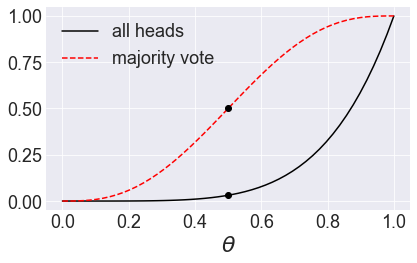

<Figure size 432x360 with 0 Axes>

In [12]:
from sympy.abc import theta,k # get some variable symbols

fig,ax = plt.subplots()
plt.figure(figsize=(6,5))
xi = np.linspace(0,1,50)
expr = S.Sum(S.binomial(5,k)*theta**(k)*(1-theta)**(5-k),(k,3,5)).doit()
ax.plot(xi, (xi)**5,'-k',label='all heads')
ax.plot(xi, S.lambdify(theta,expr)(xi),'--r',label='majority vote')
ax.plot(0.5, (0.5)**5,'ko')
ax.plot(0.5, S.lambdify(theta,expr)(0.5),'ko')
ax.set_xlabel(r'$\theta$',fontsize=22)
ax.legend(loc=0)
fig.tight_layout()
#fig.savefig('fig-statistics/Hypothesis_Testing_002.png')

<!-- dom:FIGURE: [fig-statistics/Hypothesis_Testing_002.png, width=500 frac=0.85]  Compares the power function for the all-heads test with that of the majority-vote test. <div id="fig:Hypothesis_testing_002"></div> -->
<!-- begin figure -->
<div id="fig:Hypothesis_testing_002"></div>

<p>Compares the power function for the all-heads test with that of the majority-vote test.</p>
<img src="fig-statistics/Hypothesis_Testing_002.png" width=500>

<!-- end figure -->


 In this case, the new test has *size*

$$
\alpha = \sup_{\theta < \frac{1}{2}} \theta^{5} + 5 \theta^{4} \left(- \theta + 1\right) + 10 \theta^{3} \left(- \theta + 1\right)^{2} = \frac{1}{2}
$$

 As before we only get to upwards of 90% for detection
probability only when the underlying parameter $\theta > 0.75$. 
Let's see what happens when we consider more than five samples. For
example, let's suppose that we have $n=100$ samples and we want to
vary the threshold for the majority vote test. For example, let's have
a new test where we declare $H_1$ when $k=60$ out of the 100 trials
turns out to be heads. What is the $\beta$ function in this case?

$$
\beta(\theta) = \sum_{k=60}^{100} \binom{100}{k} \theta^k(1-\theta)^{100-k}
$$

 This is too complicated to write by hand, but the statistics module
in Sympy has all the tools we need to compute this.

In [13]:
from sympy.stats import P, Binomial
theta = S.symbols('theta',real=True)
X = Binomial('x',100,theta)
beta_function = P(X>60)
print(beta_function.subs(theta,0.5)) # alpha
print(beta_function.subs(theta,0.70))

0.0176001001088524
0.979011423996075


 These results are much better than before because the $\beta$
function is much steeper. If we declare $H_1$ when we observe 60 out of 100
trials are heads, then we wrongly declare heads approximately 1.8% of the
time.  Otherwise, if it happens that the true value for $p>0.7$, we will
conclude correctly approximately 97% of the time. A quick simulation can sanity
check these results as shown below:

In [36]:
rv = stats.bernoulli(0.5) # true p = 0.5

# number of false alarms ~ 0.018
np.mean(rv.rvs((1000,100)).sum(axis=1)>60)

0.019

 The above code is pretty dense so let's unpack it. In the first line, we use the `scipy.stats` module to define the
Bernoulli random variable for the coin flip. Then, we use the `rvs` method of
the variable to generate 1000 trials of the experiment where each trial
consists of 100 coin flips. This generates a $1000 \times 100$ matrix where the
rows are the individual trials and the columns are the outcomes of each
respective set of 100 coin flips. The `sum(axis=1)` part computes the sum across the
columns. Because the values of the embedded matrix are only `1` or `0` this
gives us the count of flips that are heads per row. The next `>60` part
computes the boolean 1000-long vector of values that are bigger than 60. The
final `sum` adds these up. Again, because the entries in the array are `True`
or `False` the `sum` computes the count of times the number of heads has
exceeded 60 per 100 coin flips in each of 1000 trials. Then, dividing this
number by 1000 gives a quick approximation of false alarm probability we
computed above for this case where the true value of $p=0.5$.

## Receiver Operating Characteristic

Because the majority vote test is a binary test, we can compute the *Receiver
Operating Characteristic* (ROC) which is the graph of the $(P_{FA},
P_D)$. The term comes from radar systems but is a very general method for
consolidating all of these issues into a single graph. Let's consider a typical
signal processing example with two hypotheses. In $H_0$, there is noise but no
signal present at the receiver,

$$
H_0 \colon X =  \epsilon
$$

 where $\epsilon \sim \mathcal{N}(0,\sigma^2)$ represents additive
noise. In the alternative hypothesis, there is a  deterministic signal at the receiver,

$$
H_1 \colon X = \mu + \epsilon
$$

 Again, the problem is to choose between these two hypotheses. For
$H_0$, we have $X \sim \mathcal{N}(0,\sigma^2)$ and for $H_1$, we have $ X \sim
\mathcal{N}(\mu,\sigma^2)$.  Recall that we only observe values for $x$ and
must pick either $H_0$ or $H_1$ from these observations. Thus, we need a
threshold, $c$, to compare $x$ against in order to distinguish the two
hypotheses. [Figure](#fig:Hypothesis_testing_003) shows the probability density
functions under each of the hypotheses. The dark vertical line is the threshold
$c$. The gray shaded area is the probability of detection, $P_D$ and the shaded
area is the probability of false alarm, $P_{FA}$. The test evaluates every
observation of $x$ and concludes $H_0$ if $x<c$ and $H_1$ otherwise.

<!-- dom:FIGURE: [fig-statistics/Hypothesis_Testing_003.png, width=500 frac=0.85] The two density functions for the $H_0$ and $H_1$ hypotheses. The shaded gray area is the detection probability and the shaded blue area is the probability of false alarm. The vertical line is the decision threshold. <div id="fig:Hypothesis_testing_003"></div> -->
<!-- begin figure -->
<div id="fig:Hypothesis_testing_003"></div>

<p>The two density functions for the $H_0$ and $H_1$ hypotheses. The shaded gray area is the detection probability and the shaded blue area is the probability of false alarm. The vertical line is the decision threshold.</p>
<img src="fig-statistics/Hypothesis_Testing_003.png" width=500>

<!-- end figure -->

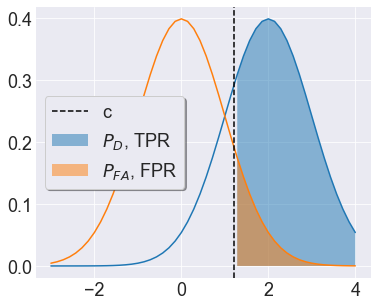

In [66]:
plt.figure(figsize=(6,5))

x = np.linspace(-3,4)

px_given_h0 = stats.norm(loc=0,scale=1)
px_given_h1 = stats.norm(loc=2,scale=1)

c=1.2

plt.plot(x,px_given_h1.pdf(x))
plt.fill_between(x,px_given_h1.pdf(x),where=(x>=c),alpha=0.5,label='$P_D$, TPR')

plt.plot(x,px_given_h0.pdf(x))
plt.fill_between(x,px_given_h0.pdf(x),where=(x>=c),alpha=0.5,label='$P_{FA}$, FPR')

plt.axvline(c,c='k',ls='--',label='c')

plt.legend(loc=6,frameon=True,fancybox=True,shadow=True)


In [106]:
def ret_fig(limiar):
    plt.figure(figsize=(6,5))

    x = np.linspace(-3,4)

    px_given_h0 = stats.norm(loc=0,scale=1)
    px_given_h1 = stats.norm(loc=2,scale=1)

    TPR = px_given_h1.sf(limiar)
    FPR = px_given_h0.sf(limiar)
    
    plt.plot(x,px_given_h1.pdf(x))
    plt.fill_between(x,px_given_h1.pdf(x),where=(x>=limiar),alpha=0.5,label=r'$P_D$, TPR = {:.3f}'.format(TPR))

    plt.plot(x,px_given_h0.pdf(x))
    plt.fill_between(x,px_given_h0.pdf(x),where=(x>=limiar),alpha=0.5,label=r'$P_{FA}, $' + 'FPR = {:.3f}'.format(FPR))

    plt.axvline(limiar,c='k',ls='--',label='c')

    plt.legend(loc=6,frameon=True,fancybox=True,shadow=True)

In [82]:
from ipywidgets import interact, fixed, FloatSlider

In [107]:
interact(ret_fig, 
         limiar=FloatSlider(min=-3,max=4,step=.1,value=1.2));

interactive(children=(FloatSlider(value=1.2, description='limiar', max=4.0, min=-3.0), Output()), _dom_classes…

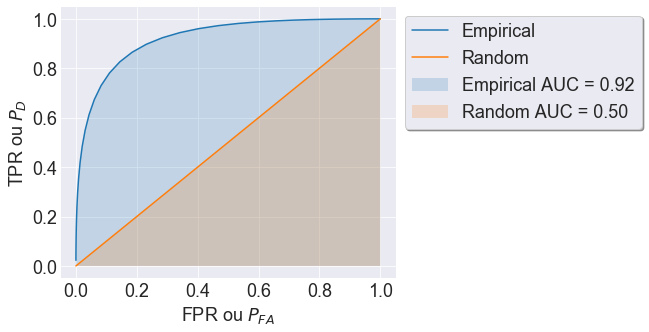

In [144]:
plt.figure(figsize=(6,5))

limiares = np.linspace(-4,4)

TPR = px_given_h1.sf(limiares)
FPR = px_given_h0.sf(limiares)

plt.plot(FPR, TPR, label='Empirical')
plt.fill_between(FPR, TPR, label='Empirical AUC = {:.2f}'.format(np.abs(np.trapz(TPR,FPR))),alpha=0.2)

plt.plot(np.linspace(0,1),np.linspace(0,1), label='Random')
plt.fill_between(np.linspace(0,1), np.linspace(0,1), label='Random AUC = 0.50',alpha=0.2)

plt.xlabel('FPR ou $P_{FA}$')
plt.ylabel('TPR ou $P_{D}$')

plt.legend(frameon=True,fancybox=True,shadow=True,bbox_to_anchor=(1.0, 1.0))

**Programming Tip.**

The shading shown in [Figure](#fig:Hypothesis_testing_003) comes from
Matplotlib's `fill_between` function. This function has a `where` keyword
argument to specify which part of the plot to apply shading with specified
`color` keyword argument. Note there is also a `fill_betweenx` function that
fills horizontally.  The `text` function can place formatted
text anywhere in the plot and can utilize basic \LaTeX{} formatting.
See the IPython notebook corresponding to this section for the source code.



As we slide the threshold left and right along the horizontal axis, we naturally change the corresponding areas under
each of the curves shown in [Figure](#fig:Hypothesis_testing_003) and thereby
change the values of $P_D$ and $P_{FA}$. The contour that emerges from sweeping
the threshold this way is the ROC as shown in [Figure](#fig:Hypothesis_testing_004). This figure also shows the diagonal line which
corresponds to making decisions based on the flip of a fair coin. Any
meaningful test must do better than coin flipping so the more the ROC bows up
to the top left corner of the graph, the better. Sometimes ROCs are quantified
into a single number called the *area under the curve* (AUC), which varies from
0.5 to 1.0 as shown. In our example, what separates the two probability density
functions is the value of $\mu$. In a real situation, this would be determined
by signal processing methods that include many complicated trade-offs. The key
idea is that whatever those trade-offs are, the test itself boils down to the
separation between these two density functions --- good tests separate the two
density functions and bad tests do not. Indeed, when there is no separation, we
arrive at the diagonal-line coin-flipping situation we just discussed.

What values for $P_D$ and $P_{FA}$ are considered *acceptable* depends on the
application. For example, suppose you are testing for a fatal disease. It could
be that you are willing to except a relatively high $P_{FA}$ value if that
corresponds to a good $P_D$ because the test is relatively cheap to administer
compared to the alternative of missing a detection. On the other hand,
may be a false alarm triggers an expensive response, so that minimizing
these alarms is more important than potentially missing a detection. These
trade-offs can only be determined by the application and design factors.

<!-- dom:FIGURE: [fig-statistics/Hypothesis_Testing_004.png, width=500 frac=0.65] The Receiver Operating Characteristic (ROC) corresponding to [Figure](#fig:Hypothesis_testing_003). <div id="fig:Hypothesis_testing_004"></div> -->
<!-- begin figure -->
<div id="fig:Hypothesis_testing_004"></div>

<p>The Receiver Operating Characteristic (ROC) corresponding to [Figure](#fig:Hypothesis_testing_003).</p>
<img src="fig-statistics/Hypothesis_Testing_004.png" width=500>

<!-- end figure -->

## P-Values

There are a lot of moving parts in hypothesis testing. What we need
is a way to consolidate the findings. The idea is that we want to find
the minimum level at which the test rejects $H_0$. Thus, the p-value
is the probability, under $H_0$, that the test-statistic is at least
as extreme as what was actually observed.  Informally, this means
that smaller values imply that $H_0$ should be rejected, although
this doesn't mean that large values imply that $H_0$ should be
retained. This is because a large p-value can arise from either $H_0$
being true or the test having low statistical power.

If $H_0$ is true, the p-value is uniformly distributed in the interval $(0,1)$.
If $H_1$ is true, the distribution of the p-value will concentrate closer to
zero. For continuous distributions, this can be proven rigorously and implies
that if we reject $H_0$ when the corresponding p-value is less than $\alpha$,
then the probability of a false alarm is $\alpha$. Perhaps it helps to
formalize this a bit before computing it. Suppose $\tau(X)$ is a test
statistic that rejects $H_0$ as it gets bigger. Then, for each sample $x$,
corresponding to the data we actually have on-hand, we define

$$
p(x) = \sup_{\theta \in \Theta_0} \mathbb{P}_{\theta}(\tau(X) > \tau(x))
$$

 This equation states that the supremum (i.e., maximum)
probability that the test statistic, $\tau(X)$, exceeds the value for
the test statistic on this particular data ($\tau(x)$) over the
domain $\Theta_0$ is defined as the p-value. Thus, this embodies a
worst-case scenario over all values of $\theta$.

Here's one way to think about this. Suppose you rejected $H_0$, and someone
says that you just got *lucky* and somehow just drew data that happened to
correspond to a rejection of $H_0$.   What p-values provide is a way to address
this by capturing the odds of just a favorable data-draw.  Thus, suppose that
your p-value is 0.05. Then, what you are showing is that the odds of just
drawing that data sample, given $H_0$ is in force, is just 5%. This means that
there's a 5% chance that you somehow lucked out and got a favorable draw of
data.

Let's make this concrete with an example. Given, the majority-vote rule above,
suppose we actually do observe three of five heads. Given the $H_0$, the
probability of observing this event is the following:

$$
p(x) =\sup_{\theta \in \Theta_0} \sum_{k=3}^5\binom{5}{k} \theta^k(1-\theta)^{5-k} = \frac{1}{2}
$$

 For the all-heads test, the corresponding computation is the following:

$$
p(x) =\sup_{\theta \in \Theta_0} \theta^5 = \frac{1}{2^5} = 0.03125
$$

From just looking at these p-values, you might get the feeling that the second
test is better, but we still have the same detection probability issues we
discussed above; so, p-values help in summarizing some aspects of our
hypothesis testing, but they do *not* summarize all the salient aspects of the
*entire* situation.

## Test Statistics

As we have seen, it is difficult to derive good test statistics for hypothesis
testing without a systematic process.  The Neyman-Pearson Test is derived from
fixing a false-alarm value ($\alpha$) and then maximizing  the detection
probability. This results in the Neyman-Pearson Test,

$$
L(\mathbf{x}) = \frac{f_{X|H_1}(\mathbf{x})}{f_{X|H_0}(\mathbf{x})} 
\underset{H_0}{\overset{H_1}{\gtrless}} \gamma
$$

 where $L$ is the likelihood ratio and where the threshold
$\gamma$ is chosen such that

$$
\int_{x:L(\mathbf{x})>\gamma} f_{X|H_0}(\mathbf{x}) d\mathbf{x}=\alpha
$$

 The Neyman-Pearson Test is one of a family of tests that use
the likelihood ratio.

**Example.** Suppose we have a receiver and we want to distinguish
whether just noise ($H_0$) or signal pluse noise ($H_1$) is received.
For the noise-only case, we have  $x\sim \mathcal{N}(0,1)$ and for the
signal pluse noise case we have $x\sim \mathcal{N}(1,1)$.  In other
words, the mean of the distribution shifts in the presence of the
signal. This is a very common problem in signal processing and
communications. The Neyman-Pearson Test then boils down to the
following,

$$
L(x)= e^{-\frac{1}{2}+x}\underset{H_0}{\overset{H_1}{\gtrless}}\gamma
$$

 Now we have to find the threshold $\gamma$ that solves the
maximization problem that characterizes the Neyman-Pearson Test. Taking
the natural  logarithm and re-arranging gives,

$$
x\underset{H_0}{\overset{H_1}{\gtrless}} \frac{1}{2}+\log\gamma
$$

 The next step is find $\gamma$ corresponding to the desired
$\alpha$ by computing it from the following,

$$
\int_{1/2+\log\gamma}^{\infty} f_{X|H_0}(x)dx = \alpha
$$

In [157]:
import scipy

In [159]:
np.exp((2**0.5)*scipy.special.erfcinv(2*0.01)-0.5)

6.211161242532841

 For example, taking $\alpha=1/100$, gives
$\gamma\approx 6.21$. To summarize the test in this case, we have,

$$
x\underset{H_0}{\overset{H_1}{\gtrless}} 2.32
$$

 Thus, if we measure $X$ and see that its value
exceeds the threshold above, we declare $H_1$ and otherwise
declare $H_0$. The following code shows how to
solve this example using Sympy and Scipy. First, we
set up the likelihood ratio,

In [162]:
n = S.stats.Normal('n',0,1) # noise H_0
s = S.stats.Normal('s',1,1) # signal+noise H_1

x = S.symbols('x',real=True)
L = S.stats.density(s)(x)/S.stats.density(n)(x)

 Next, to find the $\gamma$ value,

In [164]:
g = S.symbols('g',positive=True) # define gamma

v = S.integrate(S.stats.density(n)(x),
              (x,S.Rational(1,2)+S.log(g),S.oo))

**Programming Tip.**

Providing additional information regarding the Sympy variable by using the
keyword argument `positive=True` helps the internal simplification algorithms
work faster and better. This is especially useful when dealing with complicated
integrals that involve special functions. Furthermore, note that we used the
`Rational` function to define the `1/2` fraction, which is another way of
providing hints to Sympy. Otherwise, it's possible that the floating-point
representation of the fraction could  disguise the simple fraction and
thereby miss internal simplification opportunities.



 We want to solve for `g` in the above expression. Sympy has some
built-in numerical solvers as in the following,

In [166]:
S.nsolve(v-0.01,3.0) # approx 6.21

6.21116124253284

In [175]:
np.mean(stats.norm(0,1).rvs(1000000)>2.3235) # P(Reject H_0| H_0=True)

0.010121

 Note that in this situation it is better to use the numerical
solvers because Sympy `solve` may grind along for a long time to
resolve this.

### Generalized Likelihood Ratio Test

The likelihood ratio test can be generalized using the following statistic,

$$
\Lambda(\mathbf{x})= \frac{\sup_{\theta\in\Theta_0} L(\theta)}{\sup_{\theta\in\Theta} L(\theta)}=\frac{L(\hat{\theta}_0)}{L(\hat{\theta})}
$$

 where $\hat{\theta}_0$ maximizes $L(\theta)$ subject to
$\theta\in\Theta_0$ and $\hat{\theta}$ is the maximum likelihood estimator.
The intuition behind this generalization of the Likelihood Ratio Test is that
the denomimator is the usual maximum likelihood estimator and the numerator is
the maximum likelihood estimator, but over a restricted domain ($\Theta_0$).
This means that the ratio is always less than unity because the maximum
likelihood estimator over the entire space will always be at least as maximal
as that over the more restricted space. When this $\Lambda$ ratio gets small
enough, it means that the maximum likelihood estimator over the entire domain
($\Theta$) is larger which means that it is safe to reject the null hypothesis
$H_0$.  The tricky part is that the statistical distribution of $\Lambda$ is
usually eye-wateringly difficult.  Fortunately, Wilks Theorem says that with
sufficiently large $n$, the distribution of $-2\log\Lambda$ is approximately
chi-square with $r-r_0$ degrees of freedom, where $r$ is the number of free
parameters for $\Theta$ and $r_0$ is the number of free parameters in
$\Theta_0$.  With this result, if we want an approximate test at level
$\alpha$, we can reject $H_0$ when $-2\log\Lambda \ge \chi^2_{r-r_0}(\alpha)$
where $\chi^2_{r-r_0}(\alpha)$ denotes the $1-\alpha$ quantile of the
$\chi^2_{r-r_0}$ chi-square distribution.  However, the problem with this
result is that there is no definite way of knowing how big $n$ should be. The
advantage of this generalized likelihood ratio test is that it 
can test multiple hypotheses simultaneously, as illustrated
in the following example.

**Example.** Let's return to our coin-flipping example, except now we have
three different coins. The likelihood function is then,

$$
L(p_1,p_2,p_3) = \texttt{binom}(k_1;n_1,p_1)\texttt{binom}(k_2;n_2,p_2)\texttt{binom}(k_3;n_3,p_3)
$$

 where $\texttt{binom}$ is the binomial distribution with 
the given parameters. For example,

$$
\texttt{binom}(k;n,p) =\sum_{k=0}^n \binom{n}{k} p^k(1-p)^{n-k}
$$

  The null hypothesis is that all three coins have the
same probability of heads, $H_0:p=p_1=p_2=p_3$. The alternative hypothesis is
that at least one of these probabilites is different. Let's consider the
numerator of the $\Lambda$ first, which will give us the maximum likelihood
estimator of $p$. Because the null hypothesis is that all the $p$ values are
equal, we can just treat this as one big binomial distribution with
$n=n_1+n_2+n_3$ and $k=k_1+k_2+k_3$ is the total number of heads observed for
any coin.  Thus, under the null hypothesis, the distribution of $k$ is binomial
with parameters $n$ and $p$. Now, what is the maximum likelihood estimator for
this distribution? We have worked this problem before and have the following,

$$
\hat{p}_0= \frac{k}{n}
$$

 In other words, the maximum likelihood estimator under the null
hypothesis is the proportion of ones observed in the sequence of $n$ trials
total. Now, we have to substitute this in for the likelihood under the null
hypothesis to finish the numerator of $\Lambda$,

$$
L(\hat{p}_0,\hat{p}_0,\hat{p}_0) = \texttt{binom}(k_1;n_1,\hat{p}_0)\texttt{binom}(k_2;n_2,\hat{p}_0)\texttt{binom}(k_3;n_3,\hat{p}_0)
$$

For the denomimator of $\Lambda$, which represents the case of maximizing over
the entire space, the maximum likelihood estimator for each separate binomial
distribution is likewise,

$$
\hat{p}_i= \frac{k_i}{n_i}
$$

 which makes the likelihood in the denominator the following,

$$
L(\hat{p}_1,\hat{p}_2,\hat{p}_3) = \texttt{binom}(k_1;n_1,\hat{p}_1)\texttt{binom}(k_2;n_2,\hat{p}_2)\texttt{binom}(k_3;n_3,\hat{p}_3)
$$

 for each of the $i\in \lbrace 1,2,3 \rbrace$ binomial distributions. Then, the
$\Lambda$ statistic is then the following,

$$
\Lambda(k_1,k_2,k_3) = \frac{L(\hat{p}_0,\hat{p}_0,\hat{p}_0)}{L(\hat{p}_1,\hat{p}_2,\hat{p}_3)}
$$

 Wilks theorems states that $-2\log\Lambda$  is chi-square
distributed. We can compute this example with the statistics tools in  Sympy and
Scipy.

Text(0,0.5,'$1-\\alpha$')

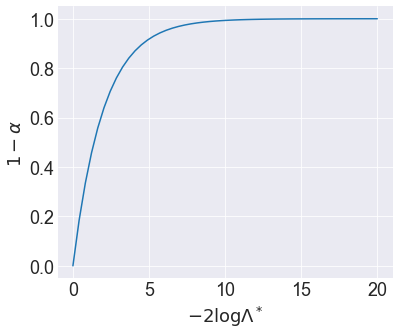

In [191]:
x = np.linspace(0,20)
plt.figure(figsize=(6,5))
plt.plot(x,stats.chi2(2).cdf(x))
plt.xlabel(r'$-2 \log \Lambda^*$')
plt.ylabel(r'$1-\alpha$')

In [222]:
x[(stats.chi2(2).cdf(x)>1-0.05)]

array([ 6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [223]:
stats.chi2(2).cdf(6.12)

0.9531123047800115

In [228]:
stats.chi2(2).isf(0.05)

5.991464547107983

In [199]:
Schi2 = S.stats.ChiSquared('x',2)

In [225]:
from sympy.abc import a
tr = S.nsolve(S.stats.cdf(Schi2)(a)-0.95,1)
tr

5.99146454710798

In [214]:
# some sample parameters
p0,p1,p2 = 0.3,0.4,0.5
n0,n1,n2 = 50,180,200

brvs = [stats.binom(i,j) for i,j in zip((n0,n1,n2),(p0,p1,p2))]

def gen_sample(n=1):
    'generate samples from separate binomial distributions'
    if n==1:
        return [i.rvs() for i in brvs]
    else:
        return [gen_sample() for k in range(n)]

In [216]:
gen_sample(1)

[13, 74, 95]

In [215]:
gen_sample(2)

[[14, 72, 95], [14, 81, 103]]

**Programming Tip.**

Note the recursion in the definition of the `gen_sample` function where a
conditional clause of the function calls itself. This is a quick way to reusing
code and generating vectorized output. Using `np.vectorize` is another way, but
the code is simple enough in this case to use the conditional clause. In
Python, it is generally bad for performance to have code with nested recursion
because of how the stack frames are managed.  However,  here we are only
recursing once so this is not an issue.



 Next, we compute the logarithm of the numerator of the $\Lambda$
statistic,

In [219]:
k0,k1,k2 = gen_sample()

print(k0,k1,k2)

pH0 = sum((k0,k1,k2))/sum((n0,n1,n2))

numer = np.sum([np.log(stats.binom(ni,pH0).pmf(ki)) 
                  for ni,ki in 
                      zip((n0,n1,n2),(k0,k1,k2))])
print(numer)

15 74 103
-12.382905962706747


 Note that we used the null hypothesis estimate for the $\hat{p}_0$.
Likewise, for the logarithm of the denominator we have the following,

In [220]:
denom = np.sum([np.log(stats.binom(ni,pi).pmf(ki)) 
                  for ni,ki,pi in 
                     zip((n0,n1,n2),(k0,k1,k2),(p0,p1,p2))])
print(denom)

-7.920479482796514


 Now, we can compute the logarithm of the $\Lambda$ statistic as
follows and see what the corresponding value is according to Wilks theorem,

In [227]:
chsq = stats.chi2(2)
logLambda =-2*(numer-denom)

print(logLambda)

print(1 - chsq.cdf(logLambda))

print(tr)

8.924852959820466
0.011534341456190922
5.99146454710798


 Because the value reported above is less than the 5% significance
level, we reject the null  hypothesis that all the coins have the same
probability of heads. Note that there are two degrees of freedom because the
difference in the number of parameters between the null hypothesis ($p$) and
the alternative ($p_1,p_2,p_3$) is two. We can build a quick Monte
Carlo simulation to check the probability of detection for this example using
the following code, which is just a combination of the last few code blocks,

In [242]:
# some sample parameters
p0,p1,p2 = 0.3,0.4,0.5
n0,n1,n2 = 50,180,200

c = chsq.isf(.05) # 5% significance level
TNR = [] #true negative rate (reject H0 when H0 is false)
FNR = [] #false negative rate (accept H0 when H0 is false)
for k0,k1,k2 in gen_sample(100):
    pH0 = sum((k0,k1,k2))/sum((n0,n1,n2))
    numer = np.sum([np.log(stats.binom(ni,pH0).pmf(ki)) 
                     for ni,ki in 
                         zip((n0,n1,n2),(k0,k1,k2))])
    denom = np.sum([np.log(stats.binom(ni,pi).pmf(ki)) 
                     for ni,ki,pi in 
                        zip((n0,n1,n2),(k0,k1,k2),(k0/n0,k1/n1,k2/n2))])
    TNR.append(-2*(numer-denom)>c)
    FNR.append(-2*(numer-denom)<c)

np.mean(TNR),np.mean(FNR) # estimated probability of detection (TNR), FNR

(0.66, 0.34)

 The above simulation shows the estimated probability of
detection, for this set of example parameters. This relative low
probability of detection means that while the test is unlikely (i.e.,
at the 5% significance level) to mistakenly pick the null hypothesis,
it is likewise missing many of the $H_1$ cases (i.e., low probability
of detection). The trade-off between which is more important is up to
the particular context of the problem. In some situations, we may
prefer additional false alarms in exchange for missing fewer $H_1$
cases.


### Permutation Test

<!-- p 475, Essential_Statistical_Inference_Boos.pdf -->
<!-- p. 35, Applied_adaptive_statistical_methods_OGorman.pdf -->
<!-- p. 80, Introduction_to_Statistics_Through_Resampling_Methods_and_R_Good.pdf -->
<!-- p. 104, Statistical_inference_for_data_science_Caffo.pdf -->
<!-- p. 178, All of statistics -->

The Permutation Test is good way to test whether or not
samples  samples come from the same distribution. For example, suppose that

$$
X_1, X_2, \ldots, X_m \sim F
$$

 and also,

$$
Y_1, Y_2, \ldots, Y_n \sim G
$$

 That is, $Y_i$ and $X_i$ come from different distributions. Suppose
we have some test statistic, for example

$$
T(X_1,\ldots,X_m,Y_1,\ldots,Y_n)  = \vert\overline{X}-\overline{Y}\vert
$$

 Under the null hypothesis for which $F=G$, any of the
$(n+m)!$ permutations are equally likely. Thus, suppose for
each of the $(n+m)!$ permutations, we have the computed
statistic,

$$
\lbrace T_1,T_2,\ldots,T_{(n+m)!} \rbrace
$$

 Then, under the null hypothesis, each of these values is equally
likely. The distribution of $T$ under the null hypothesis is the *permutation
distribution* that puts weight $1/(n+m)!$ on each $T$-value. Suppose $t_o$ is
the observed value of the test statistic and assume that large $T$ rejects the
null hypothesis, then the p-value for the permutation test is the following,

$$
P(T>t_o)= \frac{1}{(n+m)!} \sum_{j=1}^{(n+m)!} I(T_j>t_o)
$$

 where $I()$ is the indicator function. For large $(n+m)!$, we can
sample randomly from the set of all permutations to estimate this p-value.

**Example.** Let's return to our coin-flipping example from last time, but
now we have only two coins. The hypothesis is that both coins
have the same probability of heads. We can use the built-in
function in Numpy to compute the random permutations.

In [286]:
x = stats.binom(10, 0.3).rvs(5)  # p=0.3
y = stats.binom(10, 0.5).rvs(3)  # p=0.5

z = np.hstack([x, y])  # combine into one array

t_0 = abs(x.mean() - y.mean())

out = []  # output container
Ts = []
for k in range(10000):
    #Randomly permute a sequence, or return a permuted range.
    perm = np.random.permutation(z)
    T = abs(perm[:len(x)].mean() - perm[len(x):].mean())
    Ts.append(T)
    out.append((T > t_0))

f'p-value = {np.mean(out)}'

'p-value = 0.0'

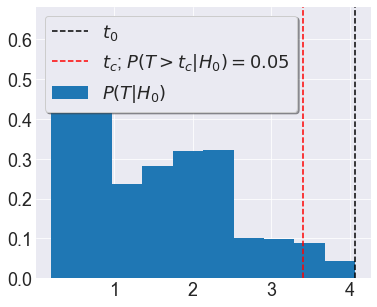

In [287]:
plt.figure(figsize=(6,5))
plt.hist(Ts,density=True,label='$P(T|H_0)$');
plt.axvline(t_0,color='k',linestyle='--', label='$t_0$')
plt.axvline(np.percentile(Ts,95),color='red',linestyle='--', label='$t_c$; $P(T>t_c|H_0) = 0.05$')

plt.legend(loc=0,frameon=True,fancybox=True,shadow=True)

 Note that the size of total permutation space is
$8!=40320$ so we are taking relatively few (i.e., 100) random
permutations from this space.

### Wald Test

The Wald Test is an asympotic test. Suppose we have $H_0:\theta=\theta_0$ and
otherwise $H_1:\theta\ne\theta_0$, the corresponding statistic is defined as
the following,

$$
W=\frac{\hat{\theta}_n-\theta_0}{\texttt{se}}
$$

 where $\hat{\theta}$ is the maximum likelihood estimator and
$\texttt{se}$ is the standard error,

$$
\texttt{se} = \sqrt{\mathbb{V}(\hat{\theta}_n)}
$$

 Under general conditions, $W\overset{d}{\to} \mathcal{N}(0,1)$.
Thus, an asympotic test at level $\alpha$ rejects when $\vert W\vert>
z_{\alpha/2}$ where $z_{\alpha/2}$ corresponds to $\mathbb{P}(\vert
Z\vert>z_{\alpha/2})=\alpha$ with $Z \sim \mathcal{N}(0,1)$.  For our favorite
coin-flipping example, if $H_0:\theta=\theta_0$, then

$$
W = \frac{\hat{\theta}-\theta_0}{\sqrt{\hat{\theta}(1-\hat{\theta})/n}}
$$

 We can simulate this using the following code at the usual
5% significance level,

In [322]:
theta0 = 0.5  # H0

k = np.random.binomial(1000, 0.3)

theta_hat = k / 1000.  # MLE

W = (theta_hat - theta0) / np.sqrt(theta_hat * (1 - theta_hat) / 1000)
c = stats.norm().isf(0.05 / 2)  # z_{alpha/2}
print(W,c,abs(W) > c)  # if true, reject H0

-12.831763101978899 1.9599639845400545 True


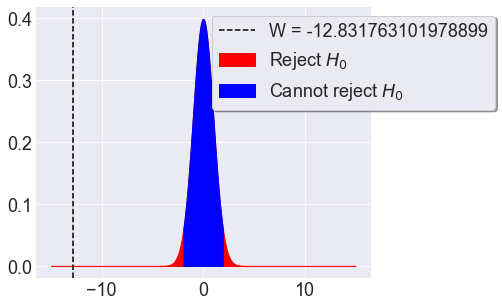

In [323]:
x = np.linspace(-15,15,num=1000)
x_r = x[np.abs(x)<stats.norm().isf(0.05 / 2)]

plt.figure(figsize=(6,5))
#plt.plot(x, stats.norm().pdf(x),)
plt.fill_between(x, stats.norm().pdf(x), color='red',label='Reject $H_0$')
plt.fill_between(x_r, stats.norm().pdf(x_r), color='blue',label='Cannot reject $H_0$')
plt.axvline(W,label=f"W = {W}",color='k',linestyle='--')

plt.legend(frameon=True,fancybox=True,shadow=True,bbox_to_anchor=(1.4, 1.0))

 This rejects $H_0$ because the true $\theta=0.3$ and the null hypothesis
is that $\theta=0.5$.  Note that $n=1000$ in this case which puts us well inside the
asympotic range of the result. We can re-do this example to estimate
the detection probability for this example as in the following code,

In [327]:
theta0 = 0.5  # H0
c = stats.norm().isf(0.05 / 2.)  # z_{alpha/2}
out = []
for i in range(100):
    k = np.random.binomial(1000, 0.3)
    theta_hat = k / 1000.  # MLE
    W = (theta_hat - theta0) / np.sqrt(theta_hat * (1 - theta_hat) / 1000.)
    out.append(abs(W) > c)  # if true, reject H0

print(np.mean(out))  # detection probability TNR (true negative rate)

1.0


## Testing Multiple Hypotheses

Thus far, we have focused primarily on two competing hypotheses. Now, we
consider multiple comparisons. The general situation is the following.  We test
the null hypothesis against  a sequence of $n$ competing hypotheses $H_k$.  We
obtain p-values for each hypothesis so now we have multiple p-values to
consider $\lbrace p_k \rbrace$. To boil this sequence down to a single
criterion, we can make the following argument. Given $n$ independent hypotheses
that are all untrue, the probability of getting at least one false alarm is the
following,

$$
P_{FA} = 1-(1-p_0)^n
$$

 where $p_0$ is the individual p-value threshold (say, 0.05). The
problem here is that $P_{FA}\rightarrow 1$ as $n\rightarrow\infty$.  If we want
to make many comparisons at once and control the overall false alarm rate the
overall p-value should be computed under the assumption that none of the
competing hypotheses is valid. The most common way to address this is with the
Bonferroni correction which says that the individual significance level should
be reduced to $p/n$. Obviously, this  makes it much harder to declare
significance for any particular hypothesis. The natural consequence of this
conservative restriction is to reduce the statistical power of the experiment,
thus making it more likely the true effects will be missed.

In 1995, Benjamini and Hochberg devised a simple method that tells which
p-values are statistically significant. The procedure is to sort the list of
p-values in ascending order, choose a false-discovery rate (say, $q$), and then
find the largest p-value in the sorted list such that $p_k \le k q/n$, where
$k$ is the p-value's position in the sorted list. Finally, declare that $p_k$
value and all the others less than it statistically significant. This procedure
guarantees that the proportion of false-positives is less than $q$  (on
average). The Benjamini-Hochberg procedure (and its derivatives) is fast and
effective and is widely used for testing hundreds of primarily false hypotheses
when studying genetics or diseases. Additionally, this
procedure provides better statistical power than the Bonferroni correction.

<!-- TODO: Fisher transformation -->
<!-- TODO: Fisher exact test -->
<!-- TODO: Cohen's D test for effect size -->
<!-- TODO: add log-linear transform -->
<!-- TODO: add Fisher transform -->
<!-- TODO: Log-Linear Models -->

In this section, we discussed the structure of statistical hypothesis testing
and defined the various  terms that are commonly used for this process, along
with the illustrations of what they mean in our running coin-flipping example.
From an engineering standpoint, hypothesis testing is not as common as
confidence-intervals and point estimates. On the other hand, hypothesis testing
is very common in social and medical science, where one must deal with
practical constraints that may limit the sample size or other aspects of the
hypothesis testing rubric. In engineering, we can usually have much more
control over the samples and models we employ because they are typically
inanimate objects that can be measured repeatedly and consistently. This is
obviously not so with human studies, which generally have other ethical and
legal considerations.

In [360]:
def wald(theta0=0.4, n=100):
    k = np.random.binomial(n, 0.3)
    theta_hat = k / n  # MLE
    W = (theta_hat - theta0) / np.sqrt(theta_hat * (1 - theta_hat) / n)
    return(stats.norm().cdf(W))

In [361]:
np.mean([wald()<0.05 for n in range(100)]) #FPR

0.64

In [391]:
np.mean([wald()<0.05/100 for n in range(100)]) #FPR

0.16

In [365]:
sorted_ps = np.sort([wald() for n in range(100)])

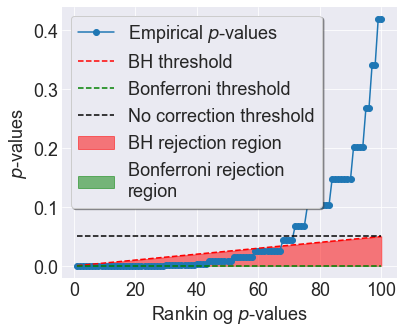

In [398]:
k_list = np.arange(1,100+1)
plt.figure(figsize=(6,5))
plt.plot(k_list,sorted_ps,'-o',label='Empirical $p$-values')

plt.plot(k_list,k_list*0.05/100, label='BH threshold',color='red',ls='--')
plt.fill_between(k_list,k_list*0.05/100,alpha=0.5,color='red',label='BH rejection region')

plt.plot(k_list,np.ones(100)*0.05/100, label='Bonferroni threshold',color='green',ls='--')
plt.fill_between(k_list,np.ones(100)*0.05/100,alpha=0.5,color='green',label='Bonferroni rejection\nregion')

plt.plot(k_list,np.ones(100)*0.05, label='No correction threshold',color='k',ls='--')
plt.fill_between(k_list,np.ones(100)*0.05/100,alpha=0.5,color='pink')

plt.ylabel('$p$-values')
plt.xlabel('Rankin og $p$-values')

plt.legend(frameon=True,fancybox=True,shadow=True)

In [394]:
np.mean(sorted_ps>k_list*0.05/100) #FPR for BH

0.33

In [393]:
np.mean(sorted_ps<0.05/100) #FPR for Bonferroni

0.19

In [396]:
np.mean(sorted_ps<0.05) #FPR with no correction

0.71